<a href="https://colab.research.google.com/github/laxmangautam/Data-Science-with-python/blob/main/RFM_Analysis_For_Successful_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# RFM Analysis For Successful Customer Segmentation

Ref:[Link](https://www.kaggle.com/abdulmeral/rfm-analysis-for-successful-customer-segmentation/notebook)

RFM Analysis & Association Rules For Successful Customer Segmentation

“RFM is a method used for analyzing customer value”.

* It groups customers based on their transaction history :
1. Recency — How many days ago was their last purchase?
2. Frequency — How many times has the customer purchased from our store?
3. Monetary Value — How much do they spend?


### Getting started

Content:

1. Load Libraries
2. Load Dataset
3. Spending of Countries
4. How RFM Analysis Works
5. Find Recency, Monetary and Frequency
  * RFM Dataframe
  * RFM Segmentation
  * RFM Segmentation Readily Answers These Questions For Business
    1. Who are my best customers?
    2. Which customers are at the verge of churning?
    3. Who are the lost customers?
    4. Who are the loyal customers?
  * Summing the RFM Score
    * Making Classification For Customers Depends On RFM Sum Score
    * RFM Segmentation Visualization
6. K-Means Segmentation
  * Plot RFM Distributions
  * Normalization
  * Elbow Method
  * KMeans Clustering with 4 Clusters
  * Which Cluster Is Our Best Customers
7. Association Rules
 * Support & Confidence Values

## Data visualization best practices

When tables like the one we just created become difficult to navigate it can be useful to use a simple plot to summarize the data.  It is possible that both a table and a plot might be needed to communicate the findings and one common practice is to include an appendix in the deliverable.  Another related practice when it comes to EDA is that the communication of your findings, usually via deliverable, is done in a clean and polished way.  If using a notebook as a communication tool take the time to remove unnecessary code blocks and other elements as they can distract from the principal takeaways.

Best practices as a data scientist generally require that all work be saved as text files:

   1. [Executable scripts](https://docs.python.org/3/using/cmdline.html)
   2. [Python modules](https://docs.python.org/3/tutorial/modules.html)
   3. [Python package](https://www.pythoncentral.io/how-to-create-a-python-package)

A module is a file containing Python definitions and statements. The file name is the module name with the
suffix `.py` appended. Jupyter notebooks have the suffix `.ipynb` and use JSON, with a lot of custom text. The readability of such files is difficult using a standard programming editor and file **readability** is key to leveraging version control.

That being said the two notable exceptions to this rule of always preserving your code in readable files are, EDA and results communication, both of which are tasks that come up frequently in data science.

Data visualization is arguably the most important tool for communicating your results to others, especially business stakeholders.  Most importantly, there are three important points to communicate to your stakeholders:                                                                                                            
   >1. what you have done
   >2. what you are doing, and
   >3. what you plan to do.

1) **Keep your code-base separated from your notebooks**

Here we will show the import of code from a Python module into a notebook to showcase the best practice of saving a maximum amount of code within files, while still making use of Jupyter as a presentation tool.  Version control is a key component to effective collaboration and reproducible research. Version control is not within the scope of this course, but systems are generally built on [git](https://git-scm.com) or [mercurial](https://www.mercurial-scm.org).  There are a [host of other websites and services as well](https://en.wikipedia.org/wiki/List_of_version-control_software).

The following links provide more context to the topic of reproducible research.

   * [Introduction to version control in the context of research](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004668)
   * [Collection of articles surveying several areas of reproducible research](https://www.nature.com/collections/prbfkwmwvz). 

2) **Keep a notebook or a record of plots and plot manipulations**

Outside of established software engineering practices there are couple of guidelines that have proven to be useful in practice.  The first is related to version control and it revolves around the use of galleries.  The [matplotlib gallery](https://matplotlib.org/gallery.html) and the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) are good starting points, but you should have your own.  Just as you would do when engineering a piece of software you should be making the extra effort when something is reusable to ensure that it can be used in a different context.  It could be as simple as a folder with a script for each.

3) **Use your plots as a quality assurance tool**

The other guideline is to make an educated guess **before** you see the plot.  Before you execute the cell or run the script take a moment to predict what the plot should look like.  You have likely already seen some of the data or created a tabular summary so you should have some intuition.  This habit is surprisingly useful for quality assurance of both data and code.

In [1]:
!pip install squarify
!pip install geopy
!pip install folium
!pip install fpgrowth
!pip install mlxtend --upgrade

  Created wheel for fpgrowth: filename=fpGrowth-1.0.0-cp37-none-any.whl size=2868 sha256=5d2cba8ee99c00d1863f50e6416ad33731397d10bf2816f9aa7f63a9f9232010
  Stored in directory: /root/.cache/pip/wheels/97/69/26/04160158e5614c425976747ccae9307c38e6c83c31eca46b28
Successfully built fpgrowth
     |████████████████████████████████| 1.4MB 26.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import squarify
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
#
from sklearn.cluster import KMeans
#
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
#
import os
import io  
import math
import sys

In [3]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
# Any results you write to the current directory are saved as output.

 
csvData = open('/content/drive/My Drive/DS_WS_POC/RFM_Customer_Segmentation/data.csv', "r", encoding='utf-8',errors='ignore').read()

data = pd.read_csv(  io.StringIO(csvData)  , sep=",")
data

Mounted at /content/drive


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# Count of Countries 
data["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [5]:
# Check missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Total Price
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
# Total Spending of Countries
data_country = data.groupby("Country").agg({'TotalPrice': lambda x: x.sum()})

# Spending of Countries

In [8]:
# Drop Unnecessary Countries for Visualization 
data_country.drop(["RSA","Unspecified","EIRE","European Community","Channel Islands"],axis=0,inplace=True)
data_country.head(10)

,TotalPrice
Country,
Australia,137077.27
Austria,10154.32
Bahrain,548.40
Belgium,40910.96
Brazil,1143.60
Canada,3666.38
Cyprus,12946.29
Czech Republic,707.72
Denmark,18768.14


### Spending of Countries



In [9]:
#installation
#pip install geopy
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [10]:
data_country.insert (0, "Latitude",0.0)
data_country.insert(1,"Longitude",0.0)
#data_country

In [11]:
indexList = list(data_country.index)
for countryName in indexList:
    lat,lon = geolocate(countryName)
    #print(countryName,lat,lon)
    data_country.loc[countryName, 'Latitude'] = lat
    data_country.loc[countryName, 'Longitude'] = lon
data_country.head()


,Latitude,Longitude,TotalPrice
Country,,,
Australia,-24.776109,134.755000,137077.27
Austria,47.200000,13.200000,10154.32
Bahrain,26.155125,50.534461,548.40
Belgium,50.640281,4.666715,40910.96
Brazil,-10.333333,-53.200000,1143.60


In [12]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(data_country, lat="Latitude", lon="Longitude", hover_name="TotalPrice", hover_data=["TotalPrice"],
                        color_discrete_sequence=["fuchsia"], zoom=1, height=500,width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":5,"t":0,"l":0,"b":0})
fig.show()


# How RFM Analysis Works
1. Choose the event that signifies activity for your application, and set the date range you want to analyze. An ecommerce app might track purchases, while a media app might monitor content viewed or rated.

2. For every user who has performed the defined event, the Analysis will calculate:

  * How many times the event has occurred
  * The last time a user performed the event View a complete analysis of your user base on a Recency and Frequency Grid, broken down into segments.

In [13]:
price = []
for i in range(len(data_country["TotalPrice"])):
    price.append(data_country["TotalPrice"][i])

country_price = pd.DataFrame(index=["AUS","AUT","BHR","BEL","BRA","CAN","CYP","CZE","DNK","FIN","FRA","DEU","GRC","HKG","ISL","ISR",
                                    "ITA","JPN","LBN","LTU","MLT","NLD","NOR","POL","PRT","SAU","SGP","ESP","SWE","CHE","USA",
                                    "ARE","GBR"],columns=["TotalPrice","country"])
country_price["country"] = data_country.index
country_price["TotalPrice"] = price
country_price.head()

,TotalPrice,country
AUS,137077.27,Australia
AUT,10154.32,Austria
BHR,548.40,Bahrain
BEL,40910.96,Belgium
BRA,1143.60,Brazil


In [14]:
worldmap = [dict(type = 'choropleth', locations = country_price['country'], locationmode = 'country names',
                 z = country_price['TotalPrice'], autocolorscale = True, reversescale = False, 
                 marker = dict(line = dict(color = 'rgb(200,200,200)', width = 0.5)), 
                 colorbar = dict(autotick = False, title = 'Total Price'))]

layout = dict(title = 'Total Price For Each Country', geo = dict(showframe = False, showcoastlines = True, 
                                                                projection = dict(type = 'Mercator')))

fig = dict(data=worldmap, layout=layout)
pyo.iplot(fig, validate=False)

### Recency and Frequency Grid
* A low recency and frequency score (bottom left) represents hibernating users who haven’t been active recently or frequently. A high recency and frequency score (top right) represents users who have been active recently and frequently, indicating your app’s champions.

* Users are then ranked in order of percentile. For example, a user who has performed the activity most recently would constitute the 100th percentile. Users are then ranked by a score of 1 through 5, based on their percentile, with 5 being the highest.

### The Recency and Frequency Grid breaks your user base down into:

* Champions [R(4 – 5), F(4 – 5)]
* Loyal Customers [R(3 – 4), F(4 – 5)]
* Potential Loyalists [R(4 – 5), F(2 – 3)]
* Promising [R(3 – 4), F(0 – 1)]
* Can’t Lose Them [R(1 – 2), F(4 – 5)]
* At Risk [R(1 – 2), F(3 – 4)]
* About to Sleep [R(2 – 3), F(1-2)]
* Hibernating [R(1 – 2), F(1 – 2)]
* New Customers R [(4 – 5), F(0 – 1)]
* Need Attention R [(2 – 3), F(2 – 3)]

In [15]:
# Change Data Type:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Adjust today:
today = dt.datetime(2012,1,1)
print(today)

# Bigger than zero and just UK
data = data[data['Quantity'] > 0]
data = data[data['TotalPrice'] > 0]
data = data[data["Country"] == "United Kingdom"]
data.shape

2012-01-01 00:00:00


(485123, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    485123 non-null  object        
 1   StockCode    485123 non-null  object        
 2   Description  485123 non-null  object        
 3   Quantity     485123 non-null  int64         
 4   InvoiceDate  485123 non-null  datetime64[ns]
 5   UnitPrice    485123 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      485123 non-null  object        
 8   TotalPrice   485123 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.0+ MB


In [17]:
# Recency and Monetary 
data_x = data.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum(),
                                        'InvoiceDate': lambda x: (today - x.max()).days})
data_x.head()

,TotalPrice,InvoiceDate
CustomerID,,
12346.0,77183.60,347
12747.0,4196.01,24
12748.0,33719.73,22
12749.0,4090.88,25
12820.0,942.34,25


In [18]:
# Dataset is basis on StockCode    
data_y = data.groupby(['CustomerID','InvoiceNo']).agg({'TotalPrice': lambda x: x.sum()})
data_y.head(20)

TotalPrice
CustomerID InvoiceNo            
12346.0    541431       77183.60
12747.0    537215         358.56
           538537         347.71
           541677         303.04
           545321         310.78
           551992         442.96
           554549         328.35
           558265         376.30
           563949         301.70
           569397         675.38
           577104         312.73
           581163         438.50
12748.0    536521           4.95
           536641           4.25
           537136         273.76
           537140          70.42
           537142          41.45
           537155          75.64
           537213           8.65
           537225         496.48

In [19]:
# Find Frequency
data_z = data_y.groupby('CustomerID').agg({'TotalPrice': lambda x: len(x)})
data_z.head()

,TotalPrice
CustomerID,
12346.0,1.0
12747.0,11.0
12748.0,209.0
12749.0,5.0
12820.0,4.0


# RFM Dataframe

In [20]:
# RFM Dataframe
rfm_table= pd.merge(data_x,data_z, on='CustomerID')

# Change Column Name
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'TotalPrice_y': 'Frequency',
                          'TotalPrice_x': 'Monetary'}, inplace= True)
rfm_table.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,77183.60,347,1.0
12747.0,4196.01,24,11.0
12748.0,33719.73,22,209.0
12749.0,4090.88,25,5.0
12820.0,942.34,25,4.0


<a id = "7"></a><br>
## RFM Segmentation

* Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [21]:
#Frequency bulma
def FScore(x,p,d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]: 
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4

quantiles = rfm_table.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(FScore, args=('Frequency',quantiles,))

#Recency 
rfm_table = rfm_table.sort_values('Recency',ascending=True)
rfm_table['Rec_Tile'] = pd.qcut(rfm_table['Recency'],5,labels=False)

#Monetary 
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'],5,labels=False)

# instead of zero, plus 1 
rfm_table['Rec_Tile'] = rfm_table['Rec_Tile'] + 1
rfm_table['Freq_Tile'] = rfm_table['Freq_Tile'] + 1
rfm_table['Mone_Tile'] = rfm_table['Mone_Tile'] + 1

# Add to dataframe
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
16446.0,168472.50,22,2.0,2,1,5,125
17389.0,31833.68,22,34.0,5,1,5,155
13069.0,4436.12,22,24.0,5,1,5,155
16954.0,2085.08,22,9.0,5,1,5,155
16558.0,8338.49,22,20.0,5,1,5,155


# RFM Segmentation Readily Answers These Questions For Busines

<a id = "11"></a><br>
## Who are the lost customers?

In [22]:
rfm_table[rfm_table['RFM Score'] == '555'].sort_values('Monetary', ascending=False).head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
13093.0,7832.47,297,8.0,5,5,5,555
17850.0,5391.21,394,34.0,5,5,5,555
17230.0,3638.41,286,8.0,5,5,5,555
17504.0,2997.03,228,9.0,5,5,5,555
15235.0,2247.51,239,12.0,5,5,5,555


<a id = "12"></a><br>
## Who are the loyal customers?

In [23]:

#Customers with high frequency value

rfm_table[rfm_table['Freq_Tile'] >= 3 ].sort_values('Monetary', ascending=False).head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
18102.0,259657.30,22,60.0,5,1,5,155
17450.0,194550.79,30,46.0,5,1,5,155
17511.0,91062.38,24,31.0,5,1,5,155
16029.0,81024.84,60,63.0,5,3,5,355
16684.0,66653.56,26,28.0,5,1,5,155


<a id = "13"></a><br>
## Summing the RFM Score
* One of the most straightforward methods is to sum our scores to a single number and define RFM levels for each score range.

In [24]:
# Calculate RFM_Score
rfm_table['RFM_Sum'] = rfm_table[['Freq_Tile','Rec_Tile','Mone_Tile']].sum(axis=1)
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,RFM_Sum
CustomerID,,,,,,,,
16446.0,168472.50,22,2.0,2,1,5,125,8
17389.0,31833.68,22,34.0,5,1,5,155,11
13069.0,4436.12,22,24.0,5,1,5,155,11
16954.0,2085.08,22,9.0,5,1,5,155,11
16558.0,8338.49,22,20.0,5,1,5,155,11


<a id = "14"></a><br>
## Making Segmentation For Customers Depends On RFM Sum Score
* We can get creative and hypothesize about what each score range entails, but for this exercise I will take inspiration from some common segment names.

In [25]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Sum'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 9)):
        return 'Champions'
    elif ((df['RFM_Sum'] >= 7) and (df['RFM_Sum'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 7)):
        return 'Potential'
    elif ((df['RFM_Sum'] >= 5) and (df['RFM_Sum'] < 6)):
        return 'Promising'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm_table['RFM_Level'] = rfm_table.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,RFM_Sum,RFM_Level
CustomerID,,,,,,,,,
16446.0,168472.50,22,2.0,2,1,5,125,8,Champions
17389.0,31833.68,22,34.0,5,1,5,155,11,Can't Loose Them
13069.0,4436.12,22,24.0,5,1,5,155,11,Can't Loose Them
16954.0,2085.08,22,9.0,5,1,5,155,11,Can't Loose Them
16558.0,8338.49,22,20.0,5,1,5,155,11,Can't Loose Them


In [26]:
rfm_table["RFM_Level"].value_counts()

Can't Loose Them      1992
Loyal                  645
Champions              543
Potential              358
Promising              236
Needs Attention        118
Require Activation      28
Name: RFM_Level, dtype: int64

In [27]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_table.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them      93.9       6.9   3229.3  1992
Champions            165.1       1.9    867.5   543
Loyal                183.1       1.4    327.9   645
Needs Attention       40.2       1.1    180.1   118
Potential             90.5       1.3    309.9   358
Promising             55.5       1.3    240.0   236
Require Activation    28.5       1.0    153.9    28


<a id = "15"></a><br>
## RFM Segmentation Visualization

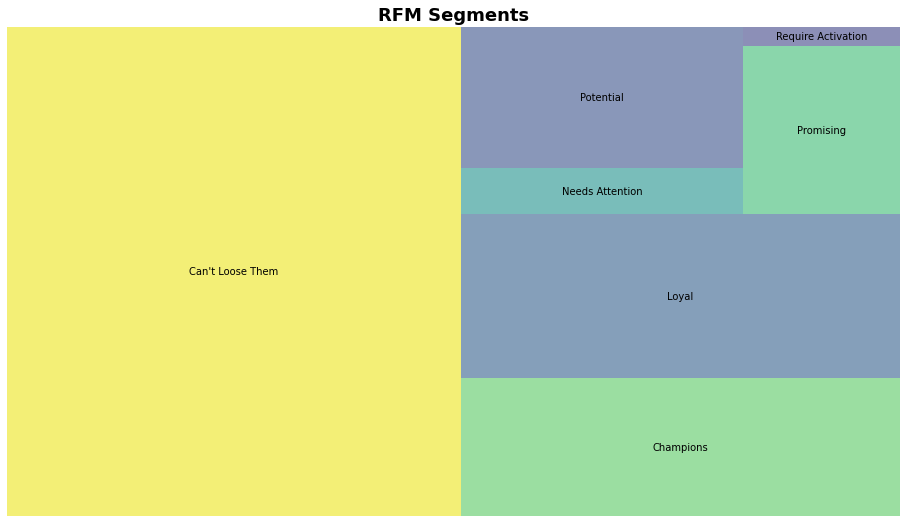

In [28]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

<a id = "16"></a><br>
## K-Means Segmentation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



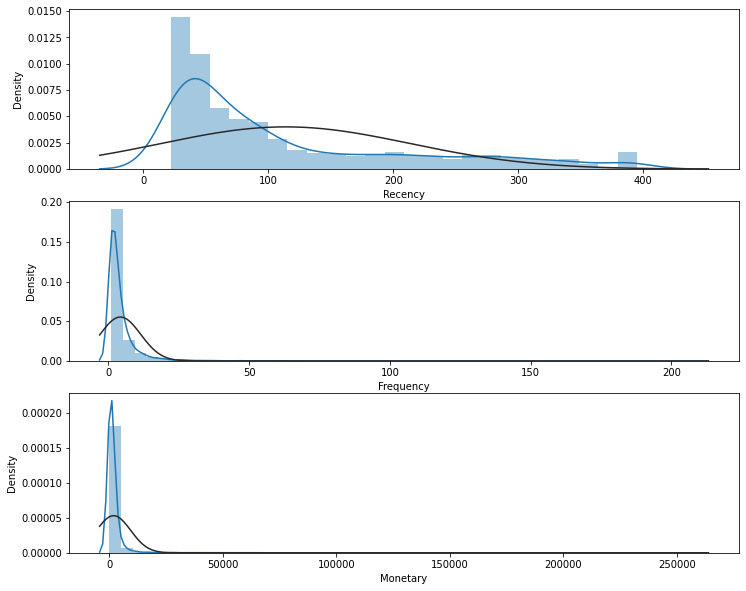

In [29]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); 
sns.distplot(rfm_table['Recency'],fit=norm)
# Plot distribution of F
plt.subplot(3, 1, 2); 
sns.distplot(rfm_table['Frequency'],fit=norm)
# Plot distribution of M
plt.subplot(3, 1, 3); 
sns.distplot(rfm_table['Monetary'],fit=norm)
# Show the plot
plt.show()

<a id = "18"></a><br>
## Normalization

In [30]:
clustering_fm = rfm_table[['Recency',"Frequency","Monetary"]].copy()
clustering_fm.head()

,Recency,Frequency,Monetary
CustomerID,,,
16446.0,22,2.0,168472.50
17389.0,22,34.0,31833.68
13069.0,22,24.0,4436.12
16954.0,22,9.0,2085.08
16558.0,22,20.0,8338.49


In [31]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_fm)
data_scaled2 = pd.DataFrame(x_scaled)

In [32]:
data_scaled2.head()

,0,1,2
0,0.0,0.004808,0.648821
1,0.0,0.158654,0.122586
2,0.0,0.110577,0.017070
3,0.0,0.038462,0.008016
4,0.0,0.091346,0.032099


<a id = "19"></a><br>
## Elbow Method

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

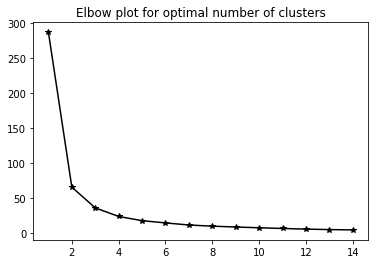

In [33]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled2)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

<a id = "20"></a><br>
## KMeans clustering with 4 clusters


In [34]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

In [35]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [36]:
from sklearn.metrics import silhouette_score
score = silhouette_score (data_scaled2, kmeans.labels_)
print("Score = ", score)

Score =  0.5597993276947545


In [37]:
y_kmeans = kmeans.predict(data_scaled2)

In [38]:
y_kmeans[:4]

array([1, 1, 1, 1], dtype=int32)

In [39]:
# Count of Clusters
d_frame = pd.DataFrame(clustering_fm)
d_frame['cluster'] = y_kmeans
d_frame['cluster'].value_counts()

1    1918
3     966
2     564
0     472
Name: cluster, dtype: int64

In [40]:
d_frame.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
16446.0,22,2.0,168472.50,1
17389.0,22,34.0,31833.68,1
13069.0,22,24.0,4436.12,1
16954.0,22,9.0,2085.08,1
16558.0,22,20.0,8338.49,1


<a id = "21"></a><br>
## Which Cluster Is Our Best Customers

In [41]:
d_frame.groupby('cluster').mean()

,Recency,Frequency,Monetary
cluster,,,
0,325.773305,1.358051,543.592458
1,40.582377,6.421794,2978.569427
2,207.618794,1.902482,701.965303
3,100.590062,2.707039,976.202197


<a id = "22"></a><br>
## Association Rules
* Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

In [42]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [43]:
data_apriori = data[data['Country']=='United Kingdom']
data_apriori.head()
data_apriori["Description"].nunique()

4007

In [44]:
# Which Product and Their Count 
data_apr = data_apriori.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
data_apr.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,...,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [45]:
def num(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_new = data_apr.applymap(num)
basket_new.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,...,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
from mlxtend.frequent_patterns import fpgrowth
rule_fp = fpgrowth(basket_new, min_support=0.02, use_colnames=True)
rule_fp

,support,itemsets
0,0.119984,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.024863,(KNITTED UNION FLAG HOT WATER BOTTLE)
2,0.022809,(RED WOOLLY HOTTIE WHITE HEART.)
3,0.026417,(HAND WARMER UNION JACK)
4,0.076086,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
395,0.022032,"(JUMBO BAG ALPHABET, JUMBO BAG RED RETROSPOT)"
396,0.025085,"(PARTY BUNTING, SPOTTY BUNTING)"
397,0.022421,"(JUMBO BAG RED RETROSPOT, JUMBO BAG VINTAGE LEAF)"
398,0.020645,"(JUMBO BAG PEARS, JUMBO BAG APPLES)"


In [ ]:
items = apriori(basket_new, min_support=0.02, use_colnames=True)
items

In [ ]:
items

<a id = "23"></a><br>
## Support & Confidence Values	
* Support
<br>

![](https://miro.medium.com/max/1400/1*bqdq-z4Ec7Uac3TT3H_1Gg.png)

* Confidence
<br>

![](https://miro.medium.com/max/1400/1*E3mNKHcudWzHySGMvo_vPg.png)

In [ ]:
rule = association_rules(items, metric="lift", min_threshold=1)
rule